In [1]:
# Required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

## Colour analysis

In [8]:
# Load test and unseen sets from pickle
with open('test_set.pkl', 'rb') as f:
    test_set = pickle.load(f)
with open('unseen_data.pkl', 'rb') as f:
    unseen_data = pickle.load(f)

In [9]:
def calculate_red_pixel_features(patient_data, process_img):
    # Define HSV masking ranges for red color    
    lower_red = np.array([160, 25, 100])
    upper_red = np.array([179, 255, 255])

    # Iterate through each patient in the dictionary
    for patient, entries in patient_data.items():
        # Iterate through each image entry for the current patient
        for entry in entries:
            if 'img' in entry and 'reconstructed' in entry:
                # Initialize 'features' key in entry if it doesn't exist
                entry['features'] = entry.get('features', [])

                # Calculate red pixels for the original image
                npixels = process_img(entry['img'], lower_red, upper_red)

                # Calculate red pixels for the reconstructed image
                recpixels = process_img(entry['reconstructed'], lower_red, upper_red)

                # Append the calculated features to 'features'
                entry['features'].append(npixels)                        # Red pixels in the original image
                entry['features'].append(abs(npixels - recpixels))       # Absolute difference
                entry['features'].append(round((recpixels + 1) / (npixels + 1), 4))  # Percentage difference

def process_img(image, lower_red, upper_red):
    # Convert image to HSV
    hsv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2HSV)

    # Create two masks to detect red pixels in both hue ranges
    red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

    # Count non-zero pixels in the red mask (indicates red pixels)
    red_pixel_count = cv2.countNonZero(red_mask)

    return red_pixel_count

In [ ]:
# Add features to datasets
calculate_red_pixel_features(test_set, process_img)
calculate_red_pixel_features(unseen_data, process_img)

In [12]:
test_set['B22-25']

[{'img': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': -1,
  'reconstructed': <PIL.Image.Image image mode=RGB size=256x256>,
  'features': [0, 0, 1.0]},
 {'img': <PIL.Image.Image image mode=RGB size=256x256>,
  'label': -1,
  'reconstructed': <PIL.Image.Image image mode=RGB size=256x256>,
  'features': [0, 0, 1.0]},
 {'patient_label': -1}]

In [24]:
# Rewrite datasets
with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)
with open('unseen_data.pkl', 'wb') as f:
    pickle.dump(unseen_data, f)

### Visualize

In [19]:
def visualize(img, titles):
    """
    Display the original image, HSV space, and red-masked image side by side.
    """
    # Convert to BGR for OpenCV, then to HSV
    cv_image = np.array(img)[:, :, ::-1]
    hsv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2HSV)

    # Define HSV ranges and create red mask
    red_mask = cv2.inRange(hsv_image, np.array([160, 25, 100]), np.array([179, 255, 255]))
    
    # Apply mask to HSV image
    red_pixels_hsv = hsv_image.copy()
    red_pixels_hsv[red_mask == 0] = 0

    # Display each image
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    
    for ax, img, title in zip(axs, [img, hsv_image, red_pixels_hsv], titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

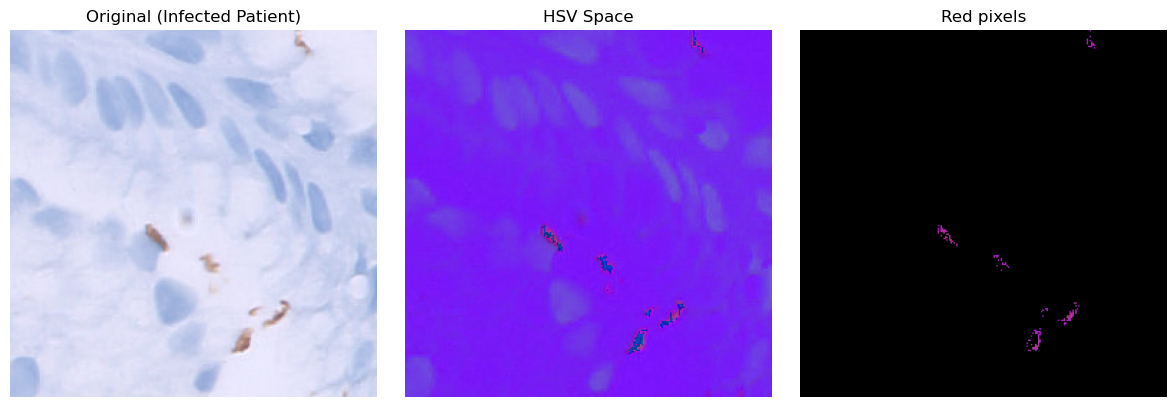

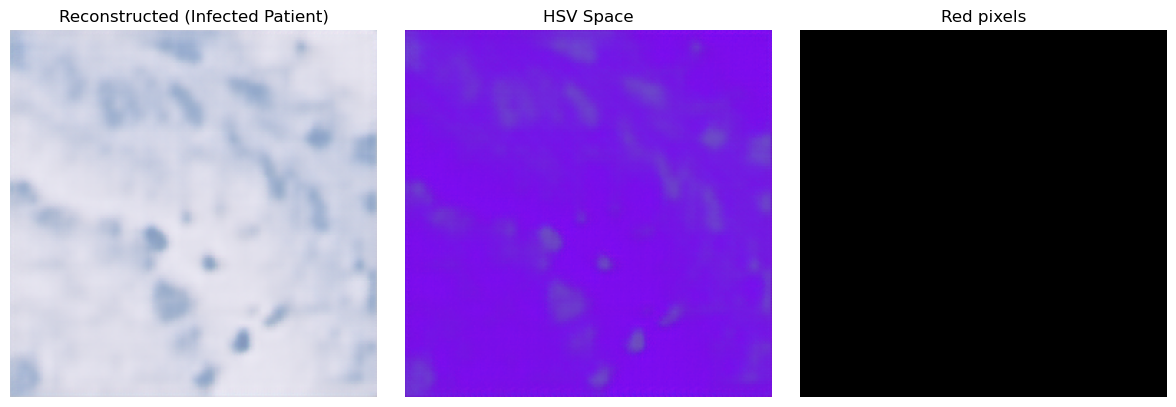

In [ ]:
# Visualize the concept behind counting red pixels
titles_bad = ['Original (Infected Patient)', 'HSV Space', f'Red pixels']
titles_bad_rec = ['Reconstructed (Infected Patient)', 'HSV Space', f'Red pixels']

visualize(test_set['B22-37'][11]['img'], ['Original (Infected Patient)', 'HSV Space', f'Red pixels'])
visualize(test_set['B22-37'][11]['reconstructed'], ['Reconstructed (Infected Patient)', 'HSV Space', f'Red pixels'])